# Sampling the Imaginary

In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import altair as alt
import scipy.stats as stats

In [2]:
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

### 3.1

In [3]:
Pr_Positive_Vampire = 0.95
Pr_Positive_Mortal = 0.01
Pr_Vampire = 0.001
Pr_Positive = Pr_Positive_Vampire*Pr_Vampire + Pr_Positive_Mortal*(1-Pr_Vampire)
Pr_Vampire_Positive = Pr_Positive_Vampire*Pr_Vampire / Pr_Positive
Pr_Vampire_Positive

0.08683729433272395

## Sampling from a grid-approximate posterior

### 3.2

In [4]:
p_grid = np.linspace(0, 1, 1000)
prior = np.repeat(1, 1000)
likelihood = stats.binom.pmf(6, 9, p_grid)
posterior = likelihood * prior
posterior = posterior / sum(posterior)

### 3.3

In [5]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

### 3.4

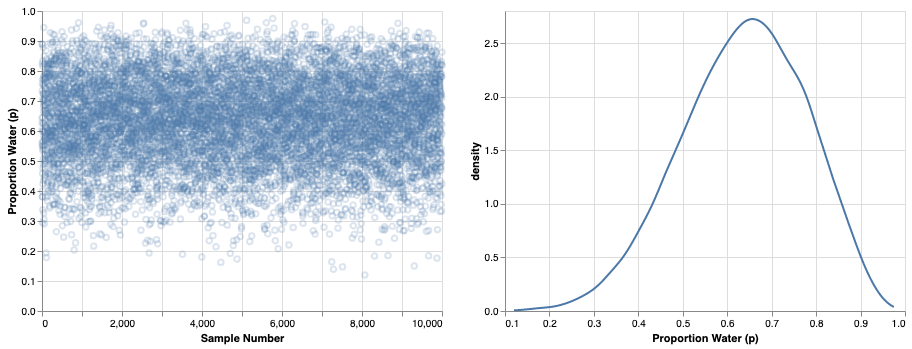

In [6]:
source = (pd.DataFrame({"samples": samples})
          .reset_index())

point_chart = (alt
              .Chart(source)
              .mark_point(opacity=0.2)
              .encode(x=alt.X('index', title="Sample Number"),
                      y=alt.Y("samples:Q", title="Proportion Water (p)"))
              .properties(title=''))

dens_chart = (alt
              .Chart(source)
              .transform_density('samples',
                                 as_=['samples', 'density'])
              .mark_line()
              .encode(x=alt.X("samples:Q", title="Proportion Water (p)"),
                      y='density:Q')
              .properties(title=''))

point_chart | dens_chart

## Sampling to Summarize

### 3.6

In [7]:
# add up posterior probability where p < 0.5
sum(posterior[p_grid < 0.5])

0.17187458902022879

### 3.7

In [8]:
sum(samples < 0.5)/1e4

0.1707

### 3.8

In [9]:
sum((0.5 < samples) & (samples < 0.75))/1e4

0.6026

### 3.9

In [10]:
np.percentile(samples, 80)

0.7617617617617618

### 3.10

In [11]:
np.percentile(samples, [10, 90])

array([0.45045045, 0.81491491])

### 3.11

In [12]:
p_grid = np.linspace(0, 1, 1000)
prior = np.repeat(1, 1000)
likelihood = stats.binom.pmf(3, 3, p_grid)
posterior = likelihood * prior
posterior = posterior/sum(posterior)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

### 3.12

In [13]:
np.percentile(samples, [25, 75])

array([0.70970971, 0.93093093])

### 3.13

In [14]:
pm.hdi(samples, hdi_prob=0.5)

array([0.84084084, 0.998999  ])

### 3.14

In [15]:
p_grid[np.argmax(posterior)]

1.0

### 3.15

In [16]:
stats.mode(samples)[0]

array([0.94794795])

### 3.16

In [17]:
np.mean(samples), np.median(samples)

(0.8019694694694695, 0.8418418418418419)

### 3.17

In [18]:
sum(posterior*np.abs(0.5 - p_grid))

0.3128751874998123

### 3.18

In [19]:
loss = [sum(posterior*np.abs(x - p_grid)) for x in p_grid]

### 3.19

In [20]:
p_grid[np.argmin(loss)]

0.8408408408408409

## Sampling to simulate prediction

### 3.20

In [21]:
stats.binom.pmf(range(3), 2, 0.7)

array([0.09, 0.42, 0.49])

### 3.21

In [22]:
stats.binom.rvs(n=2, p=0.7, size=1)

array([1])

### 3.22

In [23]:
stats.binom.rvs(n=2, p=0.7, size=10)

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 0])

### 3.23

In [24]:
from collections import Counter
dummy_w = stats.binom.rvs(n=2, p=0.7, size=int(1e5))
[(k, c/1e5) for (k, c) in Counter(dummy_w).items()]

[(1, 0.42017), (2, 0.48932), (0, 0.09051)]

### 3.24

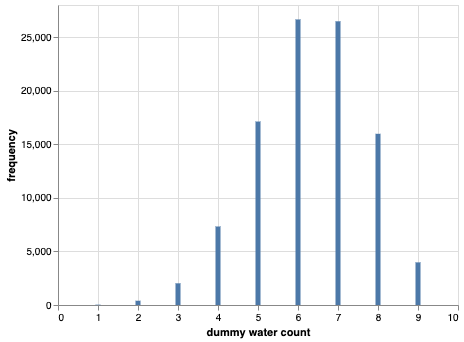

In [25]:
dummy_w = stats.binom.rvs(n=9, p=0.7, size=int(1e5))
source = (pd.DataFrame({"samples": dummy_w})
          .reset_index())

(alt
 .Chart(source)
 .mark_bar()
 .encode(x=alt.X("samples:Q", title="dummy water count"),
         y=alt.Y("count()", title="frequency")))

### 3.25

In [26]:
w = stats.binom.rvs(n=9, p=0.6, size=int(1e4))

### 3.26

In [27]:
w = stats.binom.rvs(n=9, p=samples)